# Nivell 1

### Aquesta tasca consisteix en l'elaboració d'un informe de Power BI, aprofitant les capacitats analítiques de Python. S'utilitzaran els scripts de Python creats prèviament en la Tasca 1 per a generar visualitzacions personalitzades amb les biblioteques Seaborn i Matplotlib. Aquestes visualitzacions seran integrades en l'informe de Power BI per a oferir una comprensió més profunda de la capacitat del llenguatge de programació en l'eina Power BI.

### Exercici 1

Una variable numèrica.

In [1]:
import matplotlib.pyplot as plt

# Assuming 'amount' is a column in your dataset in Power BI
amount_data = dataset['amount']

# Create a histogram plot
plt.hist(amount_data, bins=5, color='skyblue', edgecolor='black')
plt.title('Distribución del amount')
plt.xlabel('Cantidad gastada $')
plt.ylabel('Conteo transacciones')
plt.ylim(0, 150)  # Set y-axis range from 0 to 120
plt.xlim(0, 500)  # Set y-axis range from 0 to 120

# Save the plot as an image file
plt.savefig('histogram.png')

# Close the plot to prevent it from being displayed in the Python script editor
plt.close()


Resultado
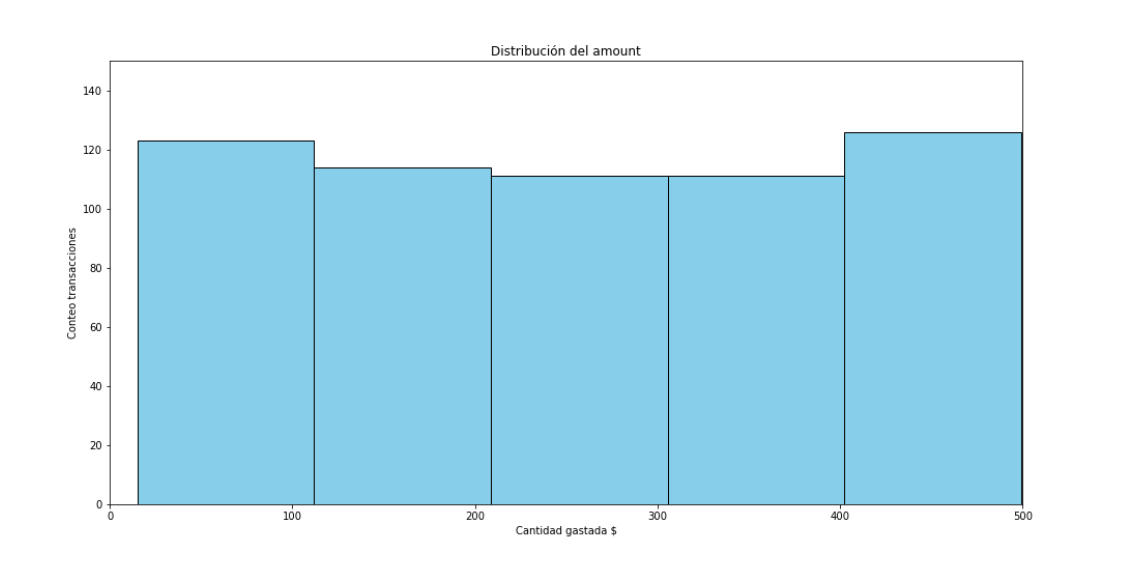

En esta Histograma, podemos ver la distribución del amount, por ejemplo vemos que el rango de productos mas vendidos son los mas caros, los que valen entre 400 y 500, tenemos alrededor de unas 130 transacciones. Pero en lineas generales podemos concluir que no hay gran diferencia de ventas por el precio de producto.


# ----------------------------------------------------------------------------------------------------------

### Exercici 2

Dues variables numèriques.

In [ ]:
import matplotlib.pyplot as plt

price_data = dataset["price"]
age_data = dataset["Age"]

plt.scatter(price_data, age_data, alpha=0.5, s=10)
plt.title('Precio producto por edad del cliente')
plt.xlabel('Precio producto')
plt.ylabel('Edad')
plt.show()

Resultado:
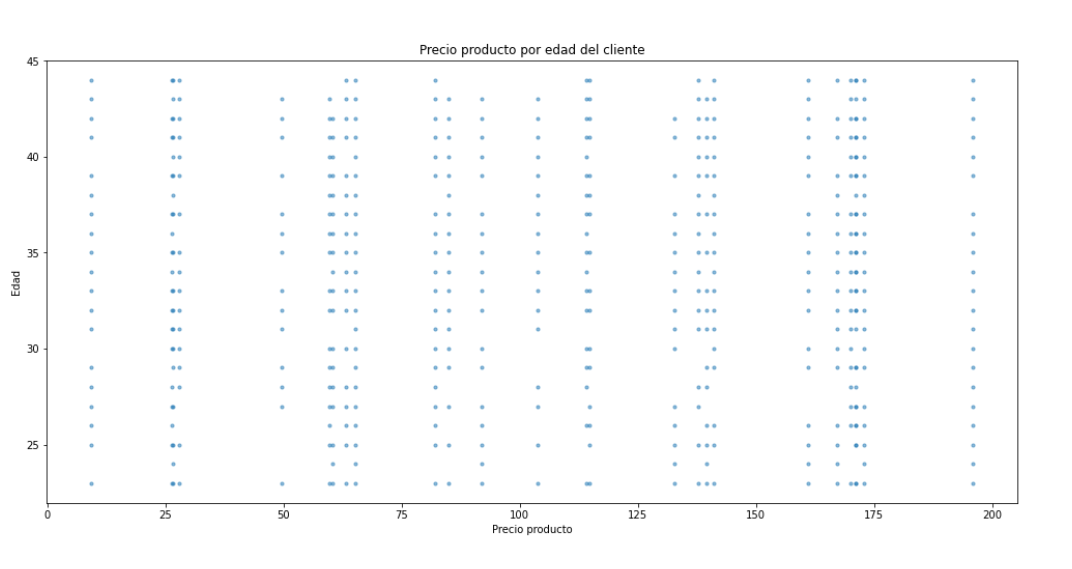

En este Scatter Plot, podemos ver que las edades que compran menos, son las más distantes, tenemos los más jovenes y las personas más mayores. Podemos ver que donde se concentran más compras son entre la gente de 30 a 40 años y que de todo el rango de precios, el que más se han comprado ronda los 170-175$.

# ------------------------------------------------------------------------------------------------------------

## Exercici 3

Una variable categòrica.

In [ ]:
import matplotlib.pyplot as plt

# Agrupar y sumar el número de usuarios por país
conteo_por_pais = dataset.groupby("country").size()

# Obtener los datos y las etiquetas
datos = conteo_por_pais.values
etiquetas = conteo_por_pais.index
myexplode = [0, 0, 0.1]

# Crear el gráfico circular (pie chart)
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%', shadow=True, explode=myexplode)

# Añadir título
plt.title('Cantidad de usuarios por País')

# Leyenda
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


Resultado:
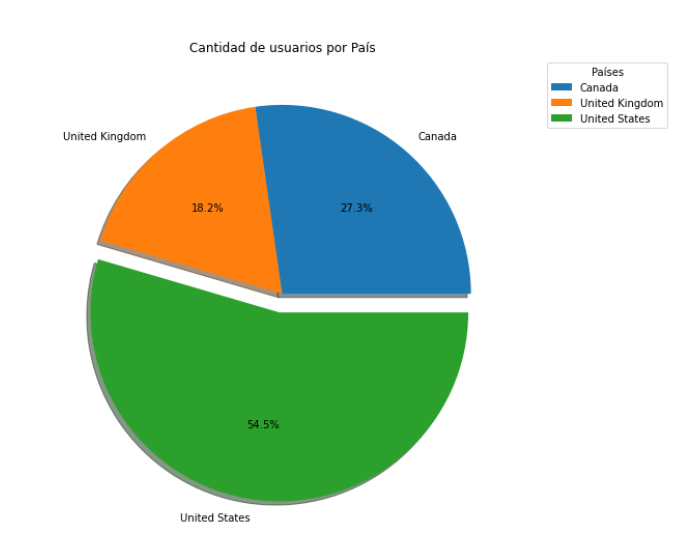

En este pie chart, podemos ver la cantidad de usuarios que tenemos por país, podemos extraer que con diferencia USA tiene más usuarios que UK y Canada juntos.

# ---------------------------------------------------------------------------------------------------------

## Exercici 4

Una variable categòrica i una numèrica.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Ordenar el DataFrame por la columna 'cantidad' (amount) en orden descendente
df_sorted = dataset.sort_values(by='amount', ascending=False)

# Crear el gráfico de barras
plt.bar(df_sorted['country'], df_sorted['amount'])

plt.title('Cantidad de dinero generado por país')
plt.ylabel('Dinero $')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Resultado:
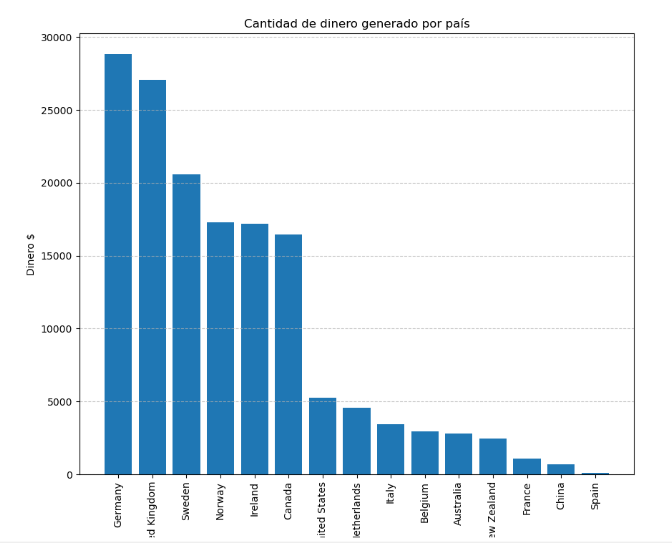


En este gráfico de barras, podemos extraer de información la cantidad de dinero que han generado cada país en ventas. Con diferencia, vemos que el grupo de países que más dinero han generado en ventas son Alemania y Reino Unido(ambos Europeos). Luego en segunda posición tendriamos a Suecia(Europeo), en tercera posicion tenemos a canada(america), Noruega y Irlanda(ambos Europeos). Y entrariamos en el cuarto grupo donde solo esta USA(y aqui haria una reflexión, justo en el ejercicio anterior, hemos podido comprobar que con gran diferencia, la mayoria de usuarios son de estados unidos, entonces aqui vendría mi pregunta, deberiamos mirar en que paises compran los usuarios de USA y que productos compran, por que si la mayoria estan comprando X producto en UK, y ese producto no lo tenemos en USA, quizas seria mas optimo añadir ese producto en el mercado de USA y poder las empresas ahorrarse envios, cambios de divisas, etc etc) y por último, tenemos el grupo de países que menos han vendido, Italia, Nueva Zelanda, España, Francia, Países Bajos, Australia, Bélgica y China

# ---------------------------------------------------------------------------------------------------------

## Exercici 5

Dues variables categòriques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

declined_data = dataset["declined"]
country_data = dataset["country"]

# Obtener los datos de transacciones aprobadas y no aprobadas por país
approved = dataset.loc[dataset["declined"] == 0].groupby("country").size()
declined = dataset.loc[dataset["declined"] == 1].groupby("country").size()

# Ordenar los datos por cantidad de transacciones aprobadas en orden descendente
approved = approved.sort_values(ascending=False)

# Ordenar los datos por cantidad de transacciones no aprobadas en orden descendente
declined = declined.sort_values(ascending=False)

# Crear una lista de países ordenados de acuerdo con las transacciones aprobadas
countries = approved.index

# Con el bar_width configuramos la anchura de las barras
bar_width = 0.35
# Aquí generamos un índice que será necesario para establecer la cantidad de países que introduciremos en el X-axis
index = np.arange(len(countries))

# Aquí generaremos la barra azul del gráfico, la cual veremos la cantidad de aprobados
plt.bar(index, approved, bar_width, label='Aprobadas')

# Aquí generamos prácticamente lo mismo, la diferencia es que añadimos el index sumándole el bar_widht
# Esto nos generará la siguiente barra a la derecha
# En vez de usar approved, aquí sumaremos los declined
plt.bar(index + bar_width, declined, bar_width, label='No Aprobadas')

# Personalizar el gráfico
plt.title('Transacciones Aprobadas vs No Aprobadas por País')
plt.xlabel('País')
plt.ylabel('Número de Transacciones')
plt.ylim(0, max(approved.max(), declined.max()) + 10)  # Ajustar el límite y para que se vea mejor
plt.xticks(index + bar_width / 2, countries, rotation=90)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()



resultado:
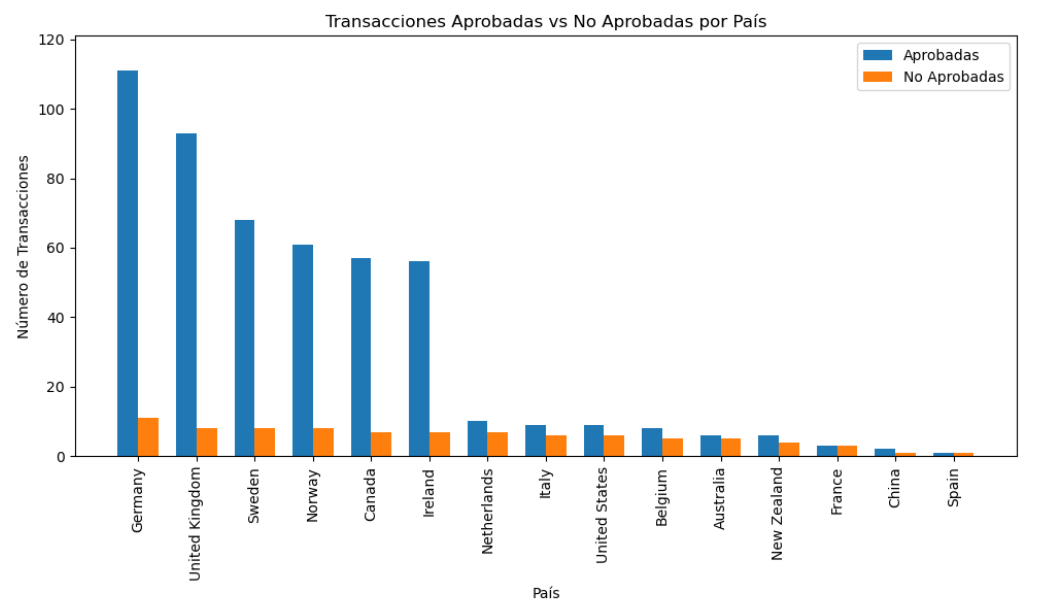

Aqui vemos que de los 15 paises que participan, 9 de ellos estan practicamente a la par entre aprobadas y no aprobadas. Los paises que estan teniendo un comportamiento esperable que sea que la mayoria de transacciones no se denieguen son los siguientes:

Europeos: Germany, UK, Sweden, Norway, Ireland | Americanos: Canada

Vemos que hay 3 países que tienen mas transacciones no aprobadas que aprobadas: Europeos: Francia, España Asiaticos: China

Vemos que el país que va mejor es Alemania y que el país que va peor es España, ambos europeos.


# -------------------------------------------------------------------------------------------------------

## - Exercici 6

Tres variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame df with the provided information
# Extract the year from the timestamp column
year = dataset["Año"]
country = dataset["country"]
amount = dataset["amount"]

# Filter the DataFrame for the years 2021 and 2022
df_2021 = dataset[dataset["Año"] == 2021]
df_2022 = dataset[dataset["Año"] == 2022]

# Calculate the total amount for each country in 2021
amount_total_2021 = df_2021.groupby("country")["amount"].sum().reset_index()

# Calculate the total amount for each country in 2022
amount_total_2022 = df_2022.groupby("country")["amount"].sum().reset_index()

# Plot the line plot
plt.figure(figsize=(12, 6))

# Plot the line for 2021
plt.plot(amount_total_2021["country"], amount_total_2021["amount"], marker='o', label='Total Amount 2021')

# Plot the line for 2022
plt.plot(amount_total_2022["country"], amount_total_2022["amount"], marker='o', label='Total Amount 2022')

# Customize the plot
plt.title('Total Transaction Amount by Country (2021 vs 2022)')
plt.xlabel('Country')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Resultado:
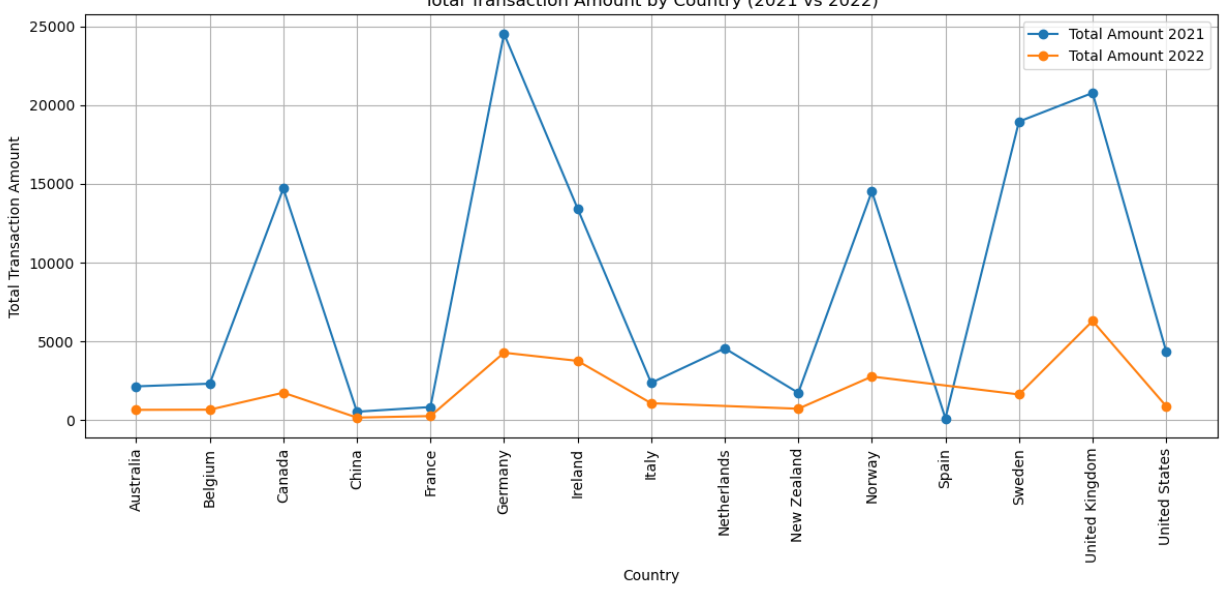


En esta gráfica podemos diferenciar rápidamente, la cantidad de dinero ganado por país por año. Confirmamos con la gráfica anterior que Alemania y Reino Unido son los que más transaciones han realizado en 2021 y 2022. Podemos ver que la tendencia de 2022 en los únicos 3 meses es bastante parecida a la de 2021, en el sentido que si fue a ese pais le fue bien, podriamos decir que hasta la fecha en ese pais le esta yendo bien. Los paises que van por la cola serian España, Francia y China

# ----------------------------------------------------------------------------------------------------

## - Exercici 7

Graficar un Pairplot.

In [ ]:
df = pd.DataFrame({
    "declined": dataset["declined"],
    "price": dataset["price"],
    "weight": dataset["weight"]
})

# Crear el pairplot
sns.pairplot(df, diag_kind="kde", kind="reg", height=2, aspect=1)
plt.show()


Resultado:
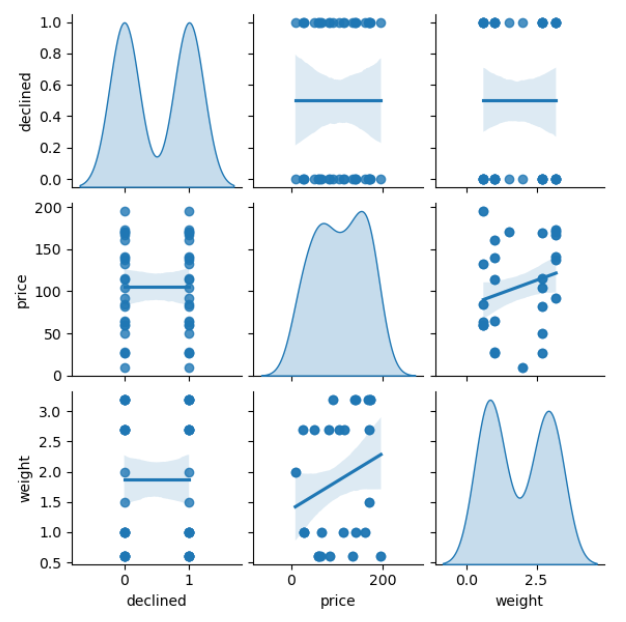

En este pairplot podemos ver las siguientes relaciones. Vemos que el declined con el peso no tiene ninguna relacion. Vemos que no hay muchos pesos intermedios, la mayoria de productos tienen un peso elevado o liviano y que en ambos pesos se compran muchisimo más en comparación con los pesos medios

# -----------------------------------------------------------------------------------------------------


## Nivell 2
Exercici 1

Correlació de totes les variables numèriques.

In [ ]:
df = pd.DataFrame({
    "declined": dataset["declined"],
    "price": dataset["price"],
    "weight": dataset["weight"],
    "amount": dataset["amount"]
})

correlation = df.corr()

# Genera un mapa de calor con la matriz de correlación
plt.figure(figsize=(8, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlación de variables numéricas')
plt.show()

Resultado:
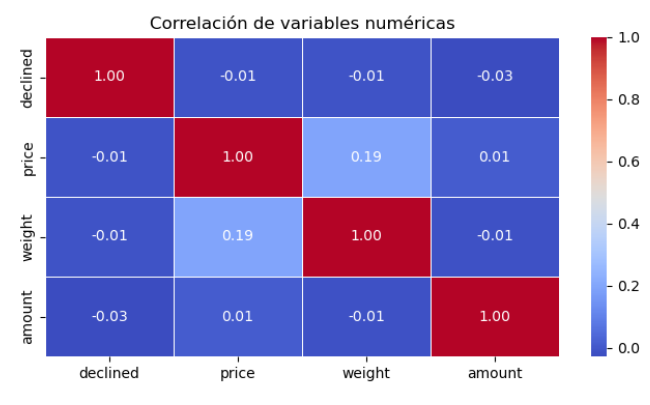

En este heatmap, estamos mirando la correlación entre las variables de peso, amount, declinados y precio. Como podemos comprobar las variables que tenemos no tienen una gran correlación, si el peso del producto aumenta o disminuye no influye en su precio, ni afecta si han sido declinadas o no.


# -----------------------------------------------------------------------------------------------------

## Exercici 2

Implementa un jointplot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame({"weight": dataset["weight"],
                    "amount": dataset["amount"]})

plt.figure(figsize = (8,6))
sns.jointplot(data = df,
              x = "weight",
              y = "amount")
plt.show()

resultado:
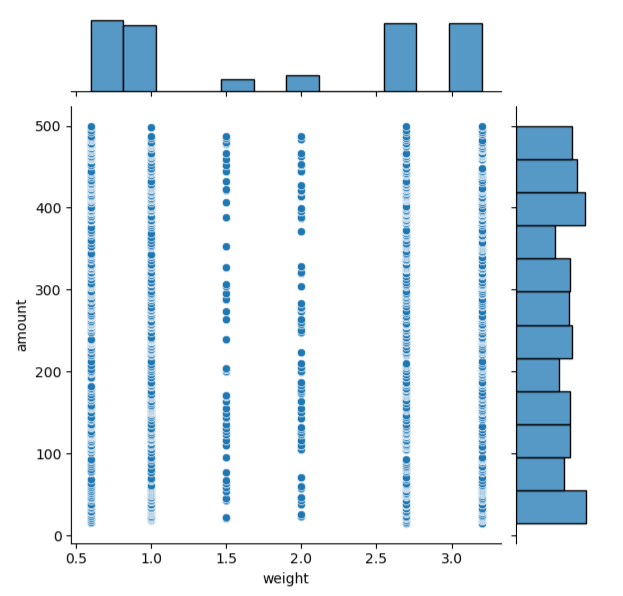

En esta gráfica quería ver si había una correlación entre precio y peso. No podemos decir con claridad que el peso sea un indicador claro en el precio, podemos ver que precisamente los precios mas caros, nos los podemos encontrar tanto en los productos con más peso como en los producto mas livianos. (Ejemplo mental: Un producto puede ser muy caro por su peso, pero hay productos livianos como las joyas que valen mucho). Si que vemos que los productos de peso intermedio han generado muchisimas menos ventas(Reflexión: Viendo que la cantidad es tan ínfima comparada con el resto de productos, quizas habria que plantearse ver la cantidad de productos que tenemos con ese peso y ver si podemos reducir el stock de estos productos?)

# -------------------------------------------------------------------------------------------------------------

# NIVELL 3

## Exercici 1

Implementa un violinplot combinat amb un altre tipus de gràfic.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"country": dataset["country"],
                    "amount": dataset["amount"]})
sns.set(style = 'whitegrid') 

 
# loading data-set
plt.figure(figsize=(10,8))
 
sns.violinplot(x ='country', y ='amount',
                   data = df,
                   inner="points",
                  cut = 0)
plt.xticks(rotation=45)

plt.show();

Resultado:
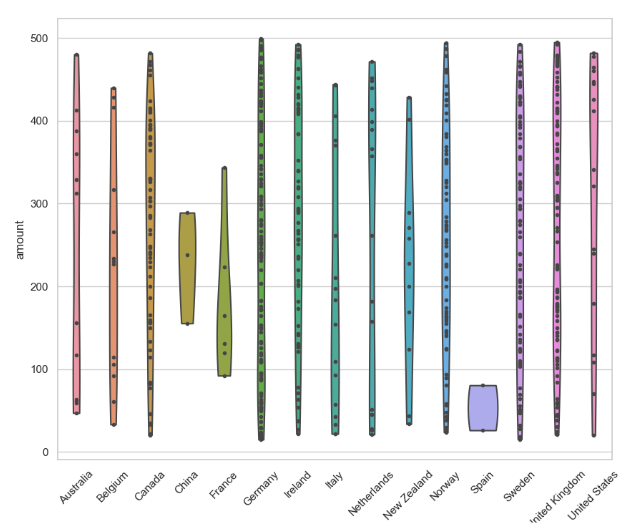

En este gráfico podemos ver la relacion entre el precio de producto minimo comprado por país, y el producto más caro comprado por país. Aparte tenemos el Scatter plot que nos ayuda a ver cuantas transacciones tambien tenemos por país.

# -----------------------------------------------------------------------------------------------

## Exercici 2

Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({"price": dataset["price"],
                    "colour": dataset["colour"],
                    "weight": dataset["weight"],
                    "country": dataset["country"],
                    "declined": dataset["declined"]})


# Definir una función lambda para asignar etiquetas de peso
def assign_weight_label(weight):
    if weight > 1.9:
        return "heavy weight"
    else:
        return "light weight"

# Aplicar la función lambda a la columna 'weight' para crear la nueva columna 'weight_label'
df['weight_label'] = df['weight'].apply(lambda x: assign_weight_label(x))

df['declined_label'] = df['declined'].map({0: 'No', 1: 'Sí'})

g = sns.FacetGrid(df, col="declined_label")
g.map_dataframe(sns.scatterplot, x="price", y="country", hue="weight_label")
g.add_legend()
plt.show();

Resultado:
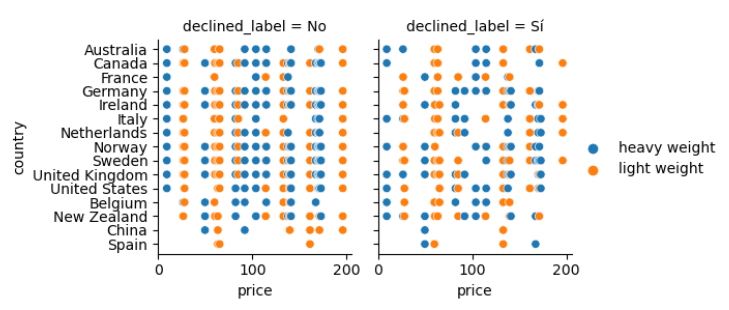

Con el FacetGrid conseguimos en este caso, poder obtener 2 gráficas, que nos dividen la información por transacciones aprobadas y no aprobadas. Dentro de la gráfica tendremos un Scatter plot dividido en 2 grupos, todos aquellos productos que pesen mas de 1.9 KG(Heavy weight- color azul) y los que pesan 1.9k o menos(lightweitght - color naranja). Con esta division por pesos podemos ver cuanto nos ha costado un producto por país y la misma vez saber si es un producto de gran peso o de peso liviano. Podemos ver por ejemplo en Alemania que la mayoría de productos que compran son de peso liviano y que compran productos de todo tipo de rango de precios. Por poner otro ejemplo vemos que Australia compraria poco, y en este caso barato y pesado.